In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/vasu/Desktop/Dataset and relavant files - Python Project 1/fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df1=pd.read_csv('/Users/vasu/Desktop/Dataset and relavant files - Python Project 1/fifa_ variable_information.csv')
df1.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [5]:
df.shape

(18207, 60)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

3. Drop the columns which you think redundant for the analysis.

In [7]:
drop_columns=['Photo', 'Flag', 'Club Logo']
df.drop(drop_columns, axis=1, inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


4. Convert the columns "Value", "Wage", "Release Clause" to float datatype
after getting rid of currency symbol and suffix.

In [13]:
def convert_currency_to_float(value):
    if isinstance(value, float):
        return value
    
    multiplier = 1
    if 'M' in value:
        multiplier = 1000000
    elif 'K' in value:
        multiplier = 1000
    return float(value.replace('€', '').replace('M', '').replace('K', '')) * multiplier

df['Value'] = df['Value'].apply(convert_currency_to_float)
df['Wage'] = df['Wage'].apply(convert_currency_to_float)
df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_float)

5. Convert the column "Joined" into integer data type with keeping only the
year.

In [17]:
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

6. Convert the column "Contract Valid Until" to pandas datetime type.

In [18]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

7. The column 'Height' is in inches with a quotation mark, Convert to float
with decimal points.

In [20]:
df['Height'] = df['Height'].apply(lambda x: float(str(x).replace("'", ".")))

8. The column "Weight" has the suffix as lbs, remove the suffix and convert
to float.

In [23]:
df['Weight'] = df['Weight'].apply(lambda x: float(str(x).replace('lbs', '')))


9. Check for the percentage of missing values and impute them with
appropriate imputation techniques.

In [25]:
# Check for missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Impute missing values with appropriate techniques
df.fillna(df.median(), inplace=True)

10. Plot the distribution of Overall rating for all the players and write your
findings.

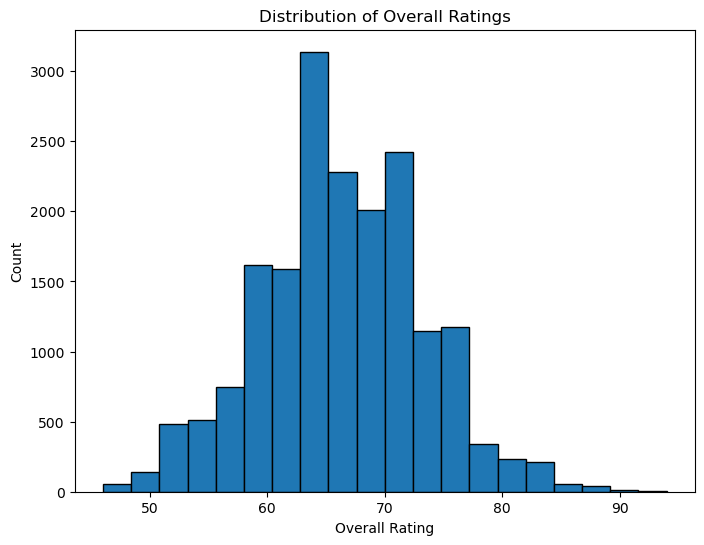

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['Overall'], bins=20, edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Distribution of Overall Ratings')
plt.show()

#Findings: Histogram shows the distribution of overall ratings for all players.
#It is slightly left-skewed, indicating that most players have an overall rating around the average or slightly below.

11. Retrieve the names of top20 players based on the Overall rating.

In [28]:
top_20_players = df.nlargest(20, 'Overall')['Name']
print(top_20_players)

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object


12. Generate a dataframe which should include all the information of the
Top 20 players based on the Overall rating.

In [29]:
top_20_players_df = df.nlargest(20, 'Overall')
print(top_20_players_df)

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

13. What is the average "Age" and "Wage" of these top 20 players? (use
the data frame created in the question 11)

In [30]:
average_age_top_20 = top_20_players_df['Age'].mean()
average_wage_top_20 = top_20_players_df['Wage'].mean()
print("Average Age:", average_age_top_20)
print("Average Wage:", average_wage_top_20)

Average Age: 28.3
Average Wage: 289700.0


14. Among the top 20 players based on the Overall rating, which player has
the highest wage? Display the name of the player with his wage.

In [31]:
highest_wage_player = top_20_players_df[top_20_players_df['Wage'] == top_20_players_df['Wage'].max()]['Name'].values[0]
highest_wage = top_20_players_df['Wage'].max()
print("Player with the Highest Wage:", highest_wage_player)
print("Highest Wage:", highest_wage)

Player with the Highest Wage: L. Messi
Highest Wage: 565000.0


15. Generate a dataframe which should include the "Player name", "Club
Name", "Wage", and 'Overall rating'.
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot

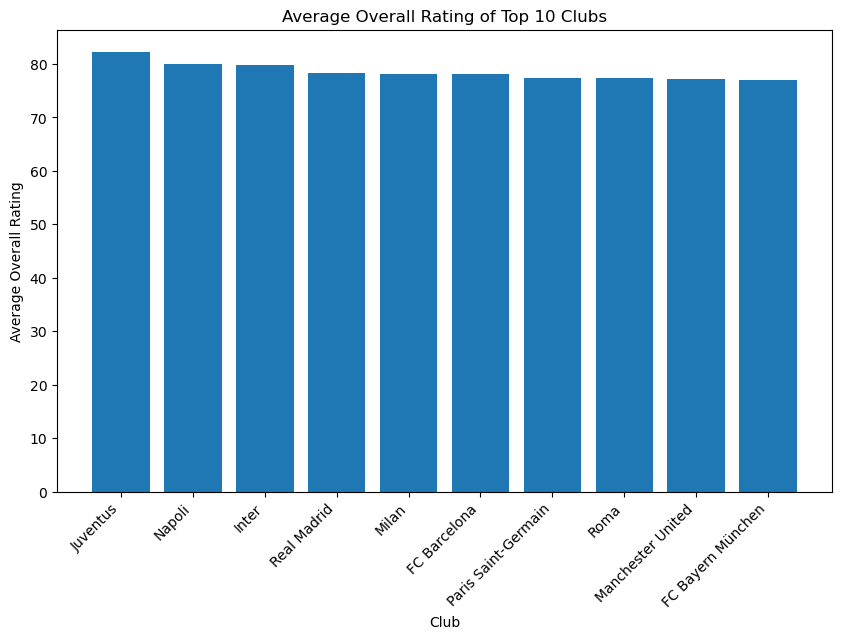

In [32]:
# Generate the required dataframe
club_wage_overall_df = df[['Name', 'Club', 'Wage', 'Overall']]

# Calculate the average Overall rating for each club
average_overall_by_club = club_wage_overall_df.groupby('Club')['Overall'].mean().reset_index()

# Find the top 10 clubs based on average Overall rating
top_10_clubs = average_overall_by_club.nlargest(10, 'Overall')

# Plot the average overall rating of top 10 clubs
plt.figure(figsize=(10, 6))
plt.bar(top_10_clubs['Club'], top_10_clubs['Overall'])
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xticks(rotation=45, ha='right')
plt.show()


16. What is the relationship between age and individual potential of the
player? Visualize the relationship with appropriate plot and Comment on
the same.

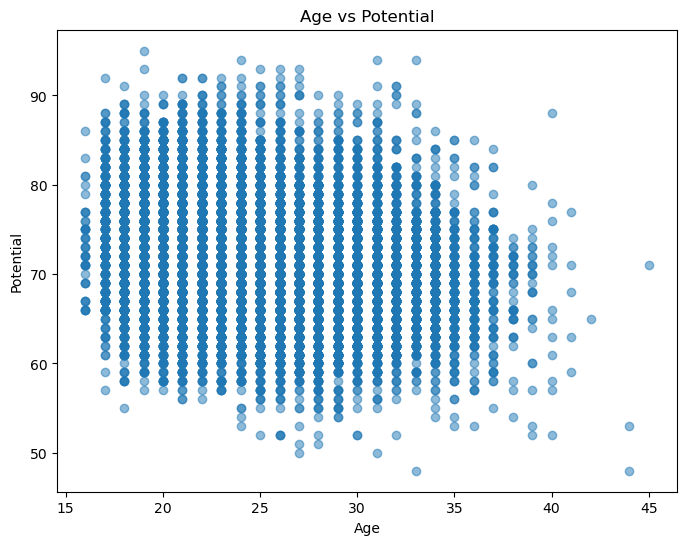

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Potential'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Age vs Potential')
plt.show()

#Comment:Young players have more room for growth and improvement in their skills, meaning they have higher potential.

17. Which features directly contribute to the wages of the players?
Support your answer with a plot and a metric.

([<matplotlib.axis.YTick at 0x7fcbf924a860>,
 [Text(0, 0, 'Potential'),
  Text(0, 1, 'Overall'),
  Text(0, 2, 'Value'),
  Text(0, 3, 'International Reputation'),
  Text(0, 4, 'Release Clause'),
  Text(0, 5, 'Wage')])

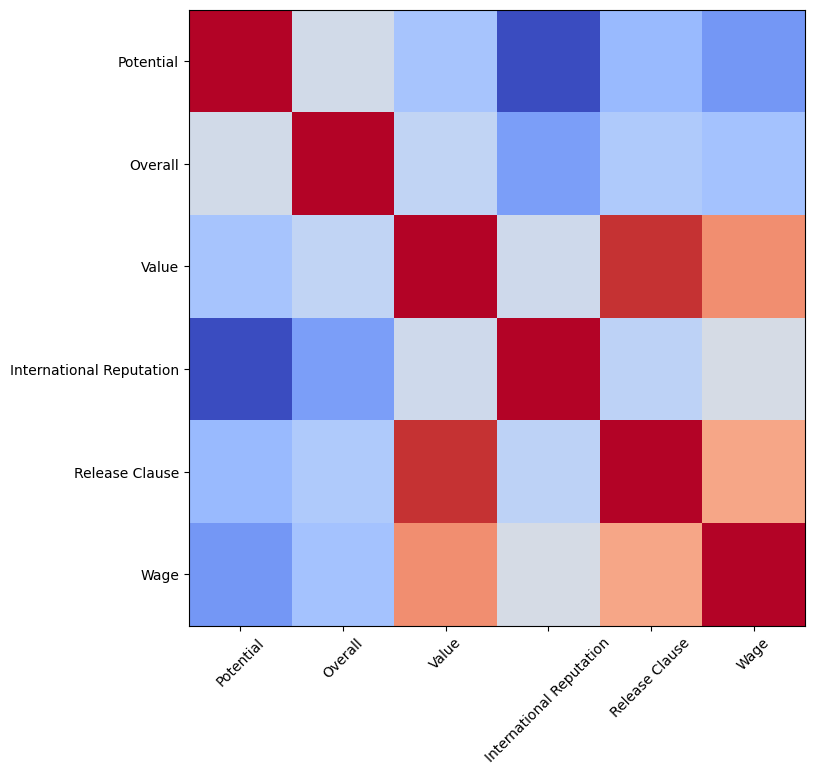

In [36]:
selected_features = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause', 'Wage']

correlation_matrix = df[selected_features].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.yticks(range(len(selected_features)), selected_features)


18. Find the position in the pitch where the maximum number of players
play and the position where the minimum number of players play? Display
it using a plot.

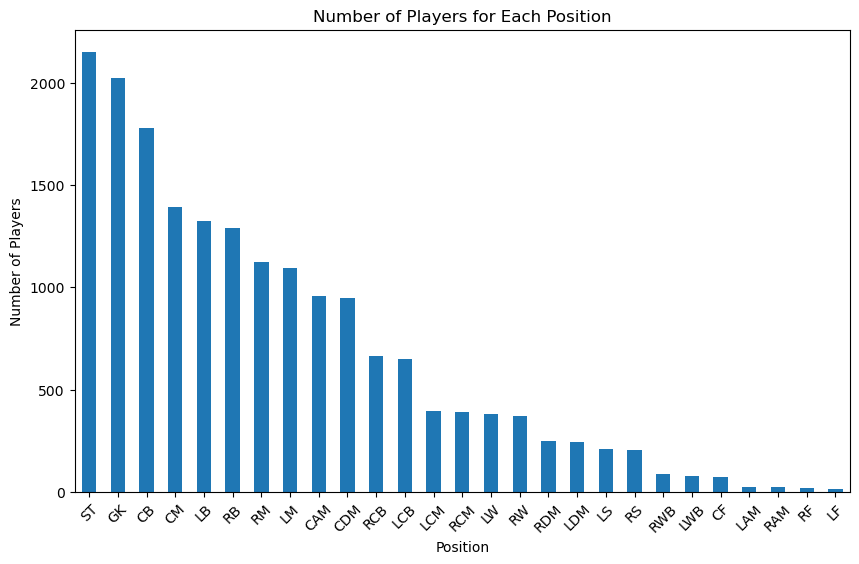

Position with the Maximum Players: ST
Position with the Minimum Players: LF


In [38]:
position_counts = df['Position'].value_counts()

max_position = position_counts.idxmax()

min_position = position_counts.idxmin()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players for Each Position')
plt.xticks(rotation=45)
plt.show()

print("Position with the Maximum Players:", max_position)
print("Position with the Minimum Players:", min_position)


19. How many players are from the club 'Juventus' and the wage is greater
than 200K? Display all the information of such players.

In [39]:
juventus_players_high_wage = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]
print(juventus_players_high_wage)

        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
1             31.0          23.0      7.0       11.0       15.0   
15            20.0          20.0      5.0        4.0        4.0   
24            93.0          90.0      3.0        3.0        2.0   

    GKPositioning GKReflexes Release Clause  
1            14.0       11.0    127100000.0  
15            5.0        8.0    153500000.0  

20. Generate a data frame containing top 5 players by Overall rating for
each unique position.

In [40]:
top_5_players_by_position = df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)
print(top_5_players_by_position)

         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

21. What is the average wage one can expect to pay for the top 5 players
in every position?

In [41]:
average_wage_by_position = top_5_players_by_position.groupby('Position')['Wage'].mean()
print(average_wage_by_position)

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
